Decision Matrix:

          Model  Accuracy  F1_Score  Inference_Time  Model_Size_MB
0     BERT-base      0.91      0.90            0.45            420
1  RoBERTa-base      0.93      0.92            0.50            500
2    DistilBERT      0.90      0.89            0.30            250
3        ALBERT      0.89      0.88            0.28            180
4         XLNet      0.92      0.91            0.55            480

Final TOPSIS Ranking:

          Model  Accuracy  F1_Score  Inference_Time  Model_Size_MB  \
3        ALBERT      0.89      0.88            0.28            180   
2    DistilBERT      0.90      0.89            0.30            250   
0     BERT-base      0.91      0.90            0.45            420   
1  RoBERTa-base      0.93      0.92            0.50            500   
4         XLNet      0.92      0.91            0.55            480   

   TOPSIS_Score  Rank  
3      0.872020   1.0  
2      0.835570   2.0  
0      0.340129   3.0  
1      0.196038   4.0  
4      0.105047

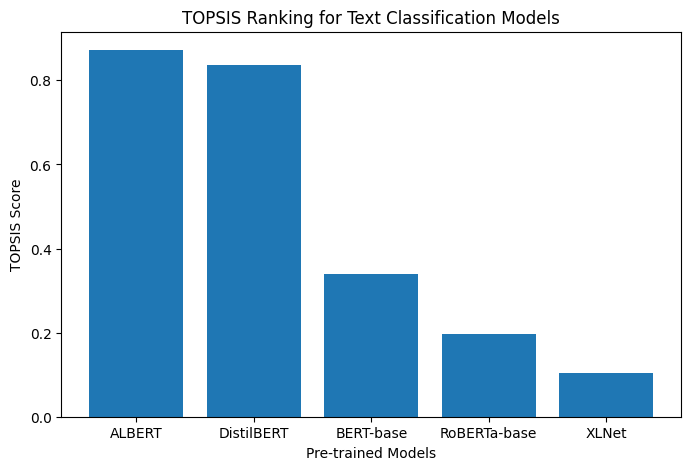

In [1]:
# =========================================
# TOPSIS FOR BEST PRE-TRAINED MODEL SELECTION
# TEXT CLASSIFICATION
# =========================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------------------
# STEP 1: Decision Matrix
# -----------------------------------------
# Metrics:
# Accuracy (↑ better)
# F1-Score (↑ better)
# Inference Time (↓ better)
# Model Size (↓ better)

data = {
    "Model": [
        "BERT-base",
        "RoBERTa-base",
        "DistilBERT",
        "ALBERT",
        "XLNet"
    ],
    "Accuracy": [0.91, 0.93, 0.90, 0.89, 0.92],
    "F1_Score": [0.90, 0.92, 0.89, 0.88, 0.91],
    "Inference_Time": [0.45, 0.50, 0.30, 0.28, 0.55],
    "Model_Size_MB": [420, 500, 250, 180, 480]
}

df = pd.DataFrame(data)
print("Decision Matrix:\n")
print(df)

# -----------------------------------------
# STEP 2: Normalize Matrix
# -----------------------------------------

criteria = df.iloc[:, 1:]
normalized = criteria / np.sqrt((criteria**2).sum())

# -----------------------------------------
# STEP 3: Assign Weights
# -----------------------------------------
# Accuracy: 40%
# F1 Score: 30%
# Inference Time: 20%
# Model Size: 10%

weights = np.array([0.4, 0.3, 0.2, 0.1])
weighted_matrix = normalized * weights

# -----------------------------------------
# STEP 4: Ideal Best & Worst
# -----------------------------------------

benefit = [True, True, False, False]

ideal_best = []
ideal_worst = []

for i in range(len(benefit)):
    if benefit[i]:
        ideal_best.append(weighted_matrix.iloc[:, i].max())
        ideal_worst.append(weighted_matrix.iloc[:, i].min())
    else:
        ideal_best.append(weighted_matrix.iloc[:, i].min())
        ideal_worst.append(weighted_matrix.iloc[:, i].max())

ideal_best = np.array(ideal_best)
ideal_worst = np.array(ideal_worst)

# -----------------------------------------
# STEP 5: Separation Measures
# -----------------------------------------

dist_best = np.sqrt(((weighted_matrix - ideal_best)**2).sum(axis=1))
dist_worst = np.sqrt(((weighted_matrix - ideal_worst)**2).sum(axis=1))

# -----------------------------------------
# STEP 6: TOPSIS Score
# -----------------------------------------

df["TOPSIS_Score"] = dist_worst / (dist_best + dist_worst)
df["Rank"] = df["TOPSIS_Score"].rank(ascending=False)

df = df.sort_values("Rank")

print("\nFinal TOPSIS Ranking:\n")
print(df)

# -----------------------------------------
# STEP 7: Visualization
# -----------------------------------------

plt.figure(figsize=(8,5))
plt.bar(df["Model"], df["TOPSIS_Score"])
plt.xlabel("Pre-trained Models")
plt.ylabel("TOPSIS Score")
plt.title("TOPSIS Ranking for Text Classification Models")
plt.show()
